# Project : Logistic Regression for Student Performance Prediction

###  What this project is about

In this notebook, we are trying to answer a very practical question:
**“Can we predict if a student will pass or fail based on their background, habits, and school-related information?”**

We will not just build a model, but we are also trying to understand the **math** behind it. This is important because in real life, schools, policymakers, and even parents make decisions based on data so we must know both *how the model works* and *what its results mean*.

---

###  Why Logistic Regression?

Logistic regression is one of the simplest yet most powerful tools for **binary classification**  problems where the outcome has only two possibilities (e.g., pass/fail, yes/no, 1/0).

In this project, we’ll use logistic regression to study student performance. For example:

* How does **study time** affect the probability of passing?
* Do factors like **parental education** or **school support** play a role?
* Can we interpret the coefficients in a way that makes sense in real life?

---

###  What we’ll do step by step

1. **Prepare the dataset** (clean it, handle missing values, encode categorical variables).
2. **Mathematical foundations** – derive the logistic regression formula, log-likelihood, and gradient.
3. **Implementation** – write logistic regression from scratch, then compare with scikit-learn.
4. **Optimization** – test different methods (gradient descent vs. Newton’s method).
5. **Advanced topics** – handle class imbalance, add regularization, interpret coefficients.
6. **Critical reflection** – talk about fairness and bias in educational datasets.

---


By the end, we’ll have:

* A working model that predicts student performance.
* A deeper understanding of the math behind logistic regression.
* Insights into the ethical challenges of applying machine learning in education.


## Dataset Attributes

### General Information

The following attributes are present in both `student-mat.csv` (Math course) and `student-por.csv` (Portuguese course) datasets:

1. **school** - student's school (binary: `"GP"` - Gabriel Pereira or `"MS"` - Mousinho da Silveira)  
2. **sex** - student's sex (binary: `"F"` - female or `"M"` - male)  
3. **age** - student's age (numeric: 15 to 22)  
4. **address** - student's home address type (binary: `"U"` - urban or `"R"` - rural)  
5. **famsize** - family size (binary: `"LE3"` - ≤3 or `"GT3"` - >3)  
6. **Pstatus** - parent's cohabitation status (binary: `"T"` - together or `"A"` - apart)  
7. **Medu** - mother's education (numeric: 0 = none, 1 = primary (4th grade), 2 = 5th–9th grade, 3 = secondary, 4 = higher education)  
8. **Fedu** - father's education (same as `Medu`)  
9. **Mjob** - mother's job (nominal: `"teacher"`, `"health"`, `"services"`, `"at_home"`, `"other"`)  
10. **Fjob** - father's job (same as `Mjob`)  
11. **reason** - reason to choose this school (nominal: `"home"`, `"reputation"`, `"course"`, `"other"`)  
12. **guardian** - student's guardian (nominal: `"mother"`, `"father"`, `"other"`)  
13. **traveltime** - home to school travel time (numeric: 1 = <15 min, 2 = 15–30 min, 3 = 30–60 min, 4 = >60 min)  
14. **studytime** - weekly study time (numeric: 1 = <2 h, 2 = 2–5 h, 3 = 5–10 h, 4 = >10 h)  
15. **failures** - number of past class failures (numeric: n if 1≤n<3, else 4)  
16. **schoolsup** - extra educational support (binary: yes/no)  
17. **famsup** - family educational support (binary: yes/no)  
18. **paid** - extra paid classes in the subject (binary: yes/no)  
19. **activities** - extra-curricular activities (binary: yes/no)  
20. **nursery** - attended nursery school (binary: yes/no)  
21. **higher** - wants higher education (binary: yes/no)  
22. **internet** - internet access at home (binary: yes/no)  
23. **romantic** - in a romantic relationship (binary: yes/no)  
24. **famrel** - quality of family relationships (numeric: 1 = very bad to 5 = excellent)  
25. **freetime** - free time after school (numeric: 1 = very low to 5 = very high)  
26. **goout** - going out with friends (numeric: 1 = very low to 5 = very high)  
27. **Dalc** - workday alcohol consumption (numeric: 1 = very low to 5 = very high)  
28. **Walc** - weekend alcohol consumption (numeric: 1 = very low to 5 = very high)  
29. **health** - current health status (numeric: 1 = very bad to 5 = very good)  
30. **absences** - number of school absences (numeric: 0 to 93)  

### Course Grades

Grades related to the specific course (Math or Portuguese):

31. **G1** - first period grade (numeric: 0 to 20)  
32. **G2** - second period grade (numeric: 0 to 20)  
33. **G3** - final grade (numeric: 0 to 20, this is the **target/output**)  

### Additional Note

- There are **382 students** that belong to both datasets.  
- These students can be identified by searching for identical attributes that characterize each student (as shown in the R file included with the data).


In [25]:
#import libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


In [5]:
df1 = pd.read_csv("student+performance/student/student-mat.csv", sep=";")


In [6]:
df1.head(5)

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [9]:
df2 = pd.read_csv("student+performance/student/student-por.csv", sep=";")


In [10]:
df2.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [11]:
# Merge datasets on common attributes
merge_cols = ["school","sex","age","address","famsize","Pstatus",
              "Medu","Fedu","Mjob","Fjob","reason","nursery","internet"]

df3 = pd.merge(df1, df2, on=merge_cols)

# Check number of students in the merged dataset
print("Number of students in merged dataset:", df3.shape[0])

Number of students in merged dataset: 382


In [12]:
df3.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel_y,freetime_y,goout_y,Dalc_y,Walc_y,health_y,absences_y,G1_y,G2_y,G3_y
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


the _x attributes are for Maths
the _y attributes are for Portuguese

In [13]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 382 entries, 0 to 381
Data columns (total 53 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   school        382 non-null    object
 1   sex           382 non-null    object
 2   age           382 non-null    int64 
 3   address       382 non-null    object
 4   famsize       382 non-null    object
 5   Pstatus       382 non-null    object
 6   Medu          382 non-null    int64 
 7   Fedu          382 non-null    int64 
 8   Mjob          382 non-null    object
 9   Fjob          382 non-null    object
 10  reason        382 non-null    object
 11  guardian_x    382 non-null    object
 12  traveltime_x  382 non-null    int64 
 13  studytime_x   382 non-null    int64 
 14  failures_x    382 non-null    int64 
 15  schoolsup_x   382 non-null    object
 16  famsup_x      382 non-null    object
 17  paid_x        382 non-null    object
 18  activities_x  382 non-null    object
 19  nursery 

In [14]:
df3.isnull().sum()

school          0
sex             0
age             0
address         0
famsize         0
Pstatus         0
Medu            0
Fedu            0
Mjob            0
Fjob            0
reason          0
guardian_x      0
traveltime_x    0
studytime_x     0
failures_x      0
schoolsup_x     0
famsup_x        0
paid_x          0
activities_x    0
nursery         0
higher_x        0
internet        0
romantic_x      0
famrel_x        0
freetime_x      0
goout_x         0
Dalc_x          0
Walc_x          0
health_x        0
absences_x      0
G1_x            0
G2_x            0
G3_x            0
guardian_y      0
traveltime_y    0
studytime_y     0
failures_y      0
schoolsup_y     0
famsup_y        0
paid_y          0
activities_y    0
higher_y        0
romantic_y      0
famrel_y        0
freetime_y      0
goout_y         0
Dalc_y          0
Walc_y          0
health_y        0
absences_y      0
G1_y            0
G2_y            0
G3_y            0
dtype: int64

In [15]:
# Check grades distribution
(df3[['G1_x','G2_x','G3_x','G1_y','G2_y','G3_y']].describe())

,G1_x,G2_x,G3_x,G1_y,G2_y,G3_y
count,382.000000,382.000000,382.000000,382.000000,382.000000,382.000000
mean,10.861257,10.712042,10.387435,12.112565,12.238220,12.515707
std,3.349167,3.832560,4.687242,2.556531,2.468341,2.945438
min,3.000000,0.000000,0.000000,0.000000,5.000000,0.000000
25%,8.000000,8.250000,8.000000,10.000000,11.000000,11.000000
50%,10.500000,11.000000,11.000000,12.000000,12.000000,13.000000
75%,13.000000,13.000000,14.000000,14.000000,14.000000,14.000000
max,19.000000,19.000000,20.000000,19.000000,19.000000,19.000000


          G1_x      G2_x      G3_x      G1_y      G2_y      G3_y
G1_x  1.000000  0.860395  0.805129  0.568008  0.588829  0.550844
G2_x  0.860395  1.000000  0.903027  0.525944  0.569656  0.507500
G3_x  0.805129  0.903027  1.000000  0.495305  0.535552  0.480349
G1_y  0.568008  0.525944  0.495305  1.000000  0.887906  0.819048
G2_y  0.588829  0.569656  0.535552  0.887906  1.000000  0.892444
G3_y  0.550844  0.507500  0.480349  0.819048  0.892444  1.000000


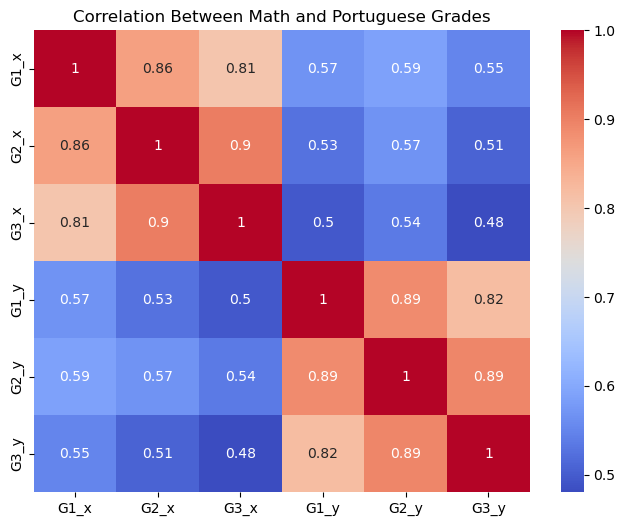

In [16]:
# Compute correlation matrix for grades
grades_corr = df3[['G1_x','G2_x','G3_x','G1_y','G2_y','G3_y']].corr()
print(grades_corr)

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(grades_corr, annot=True, cmap='coolwarm')
plt.title("Correlation Between Math and Portuguese Grades")
plt.show()


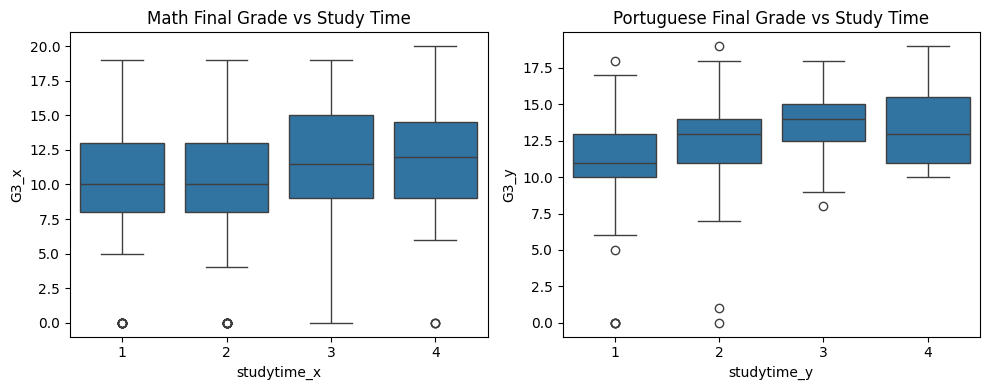

In [69]:
plt.figure(figsize=(10,4))

# Math
plt.subplot(1,2,1)
sns.boxplot(x='studytime_x', y='G3_x', data=df3)
plt.title("Math Final Grade vs Study Time")

# Portuguese
plt.subplot(1,2,2)
sns.boxplot(x='studytime_y', y='G3_y', data=df3)
plt.title("Portuguese Final Grade vs Study Time")

plt.tight_layout()
plt.show()


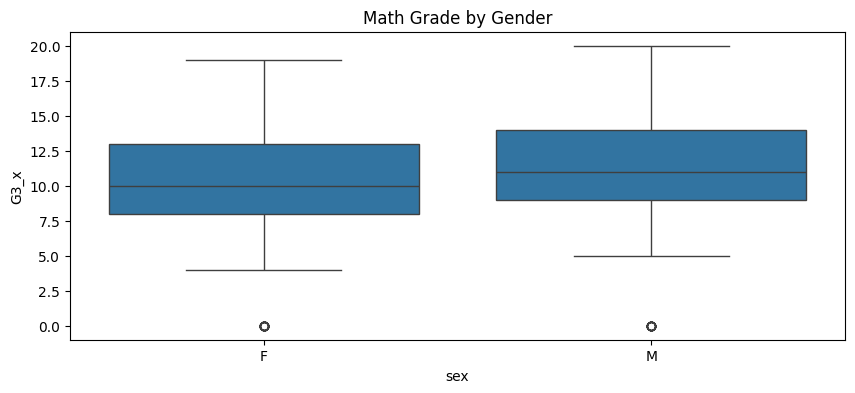

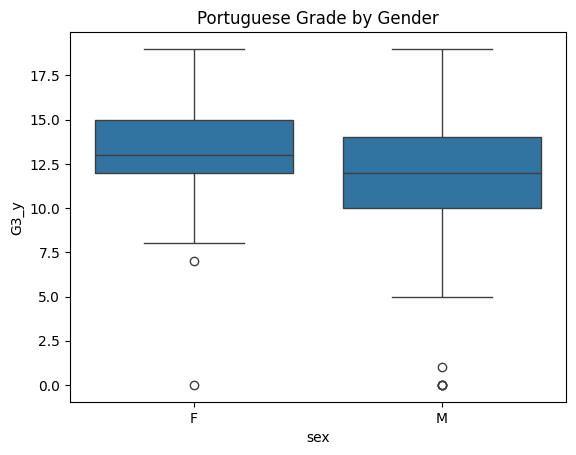

In [70]:
plt.figure(figsize=(10,4))

sns.boxplot(x='sex', y='G3_x', data=df3)
plt.title("Math Grade by Gender")
plt.show()

sns.boxplot(x='sex', y='G3_y', data=df3)
plt.title("Portuguese Grade by Gender")
plt.show()


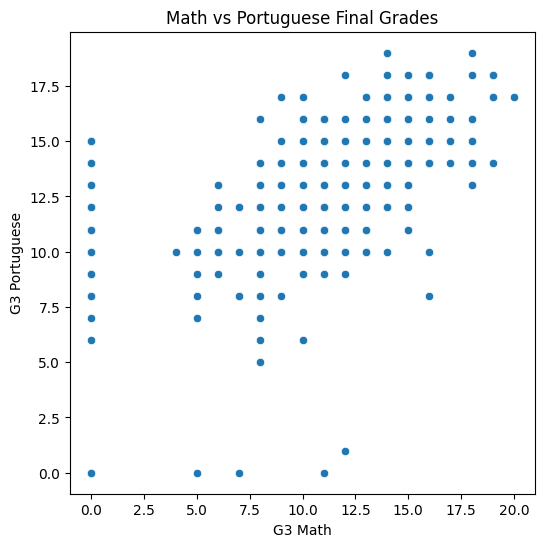

In [71]:
plt.figure(figsize=(6,6))
sns.scatterplot(x='G3_x', y='G3_y', data=df3)
plt.title("Math vs Portuguese Final Grades")
plt.xlabel("G3 Math")
plt.ylabel("G3 Portuguese")
plt.show()


In [17]:
# Create a new column 'pass_math' in the merged dataset
df1['pass_math'] = df1['G3'].apply(lambda x: 1 if x >= 10 else 0)

# Check distribution
print(df1['pass_math'].value_counts())


pass_math
1    265
0    130
Name: count, dtype: int64


In [18]:
df1.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3', 'pass_math'],
      dtype='object')

In [19]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 34 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [21]:
categorical_cols = [
    'school', 'sex', 'address', 'famsize', 'Pstatus', 
    'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 
    'famsup', 'paid', 'activities', 'nursery', 'higher', 
    'internet', 'romantic'
]


In [22]:
# One-hot encode categorical variables
df1_encoded = pd.get_dummies(df1, columns=categorical_cols, drop_first=True)

In [77]:
X_math = df1_encoded.drop(columns=['G1','G2','G3','pass_math'])

In [78]:
y_math = df1_encoded['pass_math']

### **logistic regression from scratch using gradient descent**

1. ### **Math**

In [79]:
# Check datatypes
print(X_math.dtypes)

# Ensure all features are numeric
X_math = X_math.apply(pd.to_numeric, errors='coerce').fillna(0)


age                  int64
Medu                 int64
Fedu                 int64
traveltime           int64
studytime            int64
failures             int64
famrel               int64
freetime             int64
goout                int64
Dalc                 int64
Walc                 int64
health               int64
absences             int64
school_MS             bool
sex_M                 bool
address_U             bool
famsize_LE3           bool
Pstatus_T             bool
Mjob_health           bool
Mjob_other            bool
Mjob_services         bool
Mjob_teacher          bool
Fjob_health           bool
Fjob_other            bool
Fjob_services         bool
Fjob_teacher          bool
reason_home           bool
reason_other          bool
reason_reputation     bool
guardian_mother       bool
guardian_other        bool
schoolsup_yes         bool
famsup_yes            bool
paid_yes              bool
activities_yes        bool
nursery_yes           bool
higher_yes            bool
i

In [80]:

X = X_math.values  # convert to numpy array
y = y_math.values.reshape(-1,1)  # column vector

In [81]:
# Make sure dtype is float
X = X.astype(float)
y = y.astype(float)

In [82]:
# Add bias term (column of 1s)
X = np.hstack((np.ones((X.shape[0],1)), X))  


In [83]:
#defining the sigmoid function

def sigmoid(z):
    return 1 / (1 + np.exp(-z))


- Takes any number (z) → returns probability between 0 and 1

In [84]:
def compute_loss(y, y_pred):
    # y = actual labels, y_pred = predicted probabilities
    m = y.shape[0]
    # Binary cross-entropy loss
    loss = - (1/m) * np.sum(y*np.log(y_pred) + (1-y)*np.log(1-y_pred))
    return loss


In [85]:
def gradient_descent(X, y, lr=0.01, n_iter=1000):
    m, n = X.shape
    theta = np.zeros((n,1))  # initialize weights
    losses = []

    for i in range(n_iter):
        z = np.dot(X, theta)
        y_pred = sigmoid(z)
        
        # Gradient
        gradient = (1/m) * np.dot(X.T, (y_pred - y))
        
        # Update weights
        theta -= lr * gradient
        
        # Compute loss
        loss = compute_loss(y, y_pred)
        losses.append(loss)
        
        if i % 100 == 0:
            print(f"Iteration {i}, Loss: {loss:.4f}")
            
    return theta, losses


In [86]:
#training the model

theta, losses = gradient_descent(X, y, lr=0.01, n_iter=2000)


Iteration 0, Loss: 0.6931
Iteration 100, Loss: 0.6045
Iteration 200, Loss: 0.5872
Iteration 300, Loss: 0.5756
Iteration 400, Loss: 0.5671
Iteration 500, Loss: 0.5605
Iteration 600, Loss: 0.5553
Iteration 700, Loss: 0.5510
Iteration 800, Loss: 0.5474
Iteration 900, Loss: 0.5443
Iteration 1000, Loss: 0.5417
Iteration 1100, Loss: 0.5395
Iteration 1200, Loss: 0.5375
Iteration 1300, Loss: 0.5357
Iteration 1400, Loss: 0.5341
Iteration 1500, Loss: 0.5327
Iteration 1600, Loss: 0.5314
Iteration 1700, Loss: 0.5302
Iteration 1800, Loss: 0.5291
Iteration 1900, Loss: 0.5281


In [87]:
#make predictions
def predict(X, theta, threshold=0.5):
    probs = sigmoid(np.dot(X, theta))
    return (probs >= threshold).astype(int)

y_pred = predict(X, theta)


In [88]:
#evaluate 

accuracy = np.mean(y_pred == y)
print(f"Training accuracy: {accuracy*100:.2f}%")


Training accuracy: 73.16%


## feature importance

In [89]:
# Assuming theta is the vector of weights from gradient descent
# Remember: the first weight is the bias (intercept)
feature_names = X_math.columns
weights = theta[1:].flatten()  # exclude bias

# Create DataFrame for easy visualization
feature_importance = pd.DataFrame({
    'feature': feature_names,
    'weight': weights,
    'abs_weight': np.abs(weights)
}).sort_values(by='abs_weight', ascending=False)

print(feature_importance)


              feature    weight  abs_weight
5            failures -0.713521    0.713521
8               goout -0.452907    0.452907
32         famsup_yes -0.254368    0.254368
31      schoolsup_yes -0.235960    0.235960
20      Mjob_services  0.227972    0.227972
10               Walc  0.225774    0.225774
14              sex_M  0.219689    0.219689
21       Mjob_teacher -0.203412    0.203412
36         higher_yes  0.195589    0.195589
6              famrel  0.194066    0.194066
4           studytime  0.181706    0.181706
38       romantic_yes -0.176006    0.176006
37       internet_yes  0.150665    0.150665
28  reason_reputation  0.146510    0.146510
15          address_U  0.141254    0.141254
18        Mjob_health  0.141006    0.141006
16        famsize_LE3  0.135441    0.135441
23         Fjob_other  0.134224    0.134224
1                Medu  0.132420    0.132420
7            freetime  0.125786    0.125786
27       reason_other  0.124626    0.124626
33           paid_yes  0.123965 

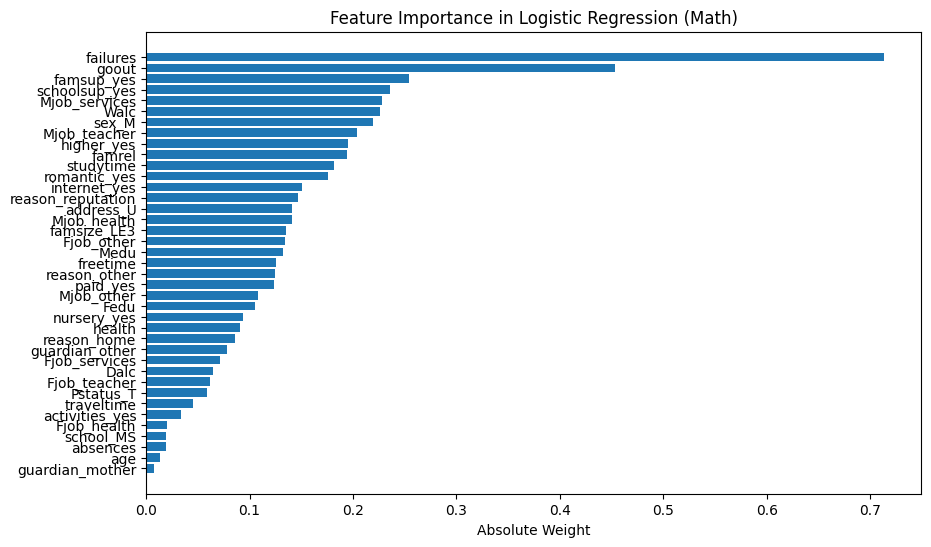

In [90]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.barh(feature_importance['feature'], feature_importance['abs_weight'])
plt.xlabel("Absolute Weight")
plt.title("Feature Importance in Logistic Regression (Math)")
plt.gca().invert_yaxis()
plt.show()


In [91]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [92]:
theta_train, losses_train = gradient_descent(X_train, y_train, lr=0.01, n_iter=2000)


Iteration 0, Loss: 0.6931
Iteration 100, Loss: 0.6019
Iteration 200, Loss: 0.5838
Iteration 300, Loss: 0.5719
Iteration 400, Loss: 0.5632
Iteration 500, Loss: 0.5564
Iteration 600, Loss: 0.5508
Iteration 700, Loss: 0.5462
Iteration 800, Loss: 0.5423
Iteration 900, Loss: 0.5389
Iteration 1000, Loss: 0.5359
Iteration 1100, Loss: 0.5333
Iteration 1200, Loss: 0.5309
Iteration 1300, Loss: 0.5288
Iteration 1400, Loss: 0.5269
Iteration 1500, Loss: 0.5251
Iteration 1600, Loss: 0.5235
Iteration 1700, Loss: 0.5221
Iteration 1800, Loss: 0.5207
Iteration 1900, Loss: 0.5194


In [93]:
def accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

y_train_pred = predict(X_train, theta_train)
y_test_pred = predict(X_test, theta_train)

print("Training accuracy:", accuracy(y_train, y_train_pred))
print("Test accuracy:", accuracy(y_test, y_test_pred))


Training accuracy: 0.7436708860759493
Test accuracy: 0.7215189873417721


#### Regularization on mathematical Log Reg

In [42]:
df1 = pd.read_csv("student+performance/student/student-mat.csv", sep=";")
df1['pass_math'] = df1['G3'].apply(lambda x: 1 if x >= 10 else 0)

# Prepare feature matrix X and target vector y
X_math = df1.drop(columns=['G3', 'pass_math'])  # Drop target and any non-feature columns
y_math = df1['pass_math']

# Ensure all features are numeric
X_math = X_math.apply(pd.to_numeric, errors='coerce').fillna(0)

X = X_math.values  # Convert features to a numpy array
y = y_math.values.reshape(-1, 1)  # Convert target to a column vector

# Ensure dtype is float
X = X.astype(float)
y = y.astype(float)

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def compute_loss(X, y, theta, lambda_reg=0.01):
    m = len(y)
    predictions = sigmoid(X @ theta)
    
    # Compute the loss with L2 regularization
    loss = (-1 / m) * (y.T @ np.log(predictions + 1e-15) + (1 - y).T @ np.log(1 - predictions + 1e-15))
    reg_loss = (lambda_reg / (2 * m)) * np.sum(np.square(theta[1:]))  # Regularization term
    return loss + reg_loss

def gradient_descent(X, y, lr=0.01, n_iter=1000, lambda_reg=0.01):
    m, n = X.shape
    theta = np.zeros((n, 1))  # Ensure theta is a column vector
    losses = []

    for _ in range(n_iter):
        predictions = sigmoid(X @ theta)
        error = predictions - y
        
        # Compute gradient with L2 regularization
        gradient = (1 / m) * (X.T @ error) + (lambda_reg / m) * np.vstack(([0], theta[1:]))  # Regularization term
        
        theta -= lr * gradient

        loss = compute_loss(X, y, theta, lambda_reg)
        losses.append(loss)

    return theta, losses

def predict(X, theta):
    return (sigmoid(X @ theta) >= 0.5).astype(int)

def accuracy(y_true, y_pred):
    return np.mean(y_true.flatten() == y_pred.flatten())

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model with regularization
theta_train, losses_train = gradient_descent(X_train, y_train, lr=0.01, n_iter=2000, lambda_reg=0.1)

# Make predictions
y_train_pred = predict(X_train, theta_train)
y_test_pred = predict(X_test, theta_train)

# Print accuracies
print("Training accuracy after regularization:", accuracy(y_train, y_train_pred))
print("Test accuracy after regularization::", accuracy(y_test, y_test_pred))

Training accuracy: 0.9367088607594937
Test accuracy: 0.9113924050632911


#### Scikit-Learn Logistic Regression

In [23]:
df1_encoded.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,guardian_mother,guardian_other,schoolsup_yes,famsup_yes,paid_yes,activities_yes,nursery_yes,higher_yes,internet_yes,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,...,True,False,True,False,False,False,True,True,False,False
1,17,1,1,1,2,0,5,3,3,1,...,False,False,False,True,False,False,False,True,True,False
2,15,1,1,1,2,3,4,3,2,2,...,True,False,True,False,True,False,True,True,True,False
3,15,4,2,1,3,0,3,2,2,1,...,True,False,False,True,True,True,True,True,True,True
4,16,3,3,1,2,0,4,3,2,1,...,False,False,False,True,True,False,True,True,False,False


In [24]:
X_math = df1_encoded.drop(columns=['G1','G2','G3','pass_math'])
y_math = df1_encoded['pass_math']

In [29]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Create a pipeline with scaling and logistic regression
pipe = make_pipeline(StandardScaler(), LogisticRegression(max_iter=200))

# Fit the model
pipe.fit(X_train, y_train)

# Score the model
print(f"Test Score: {pipe.score(X_test, y_test)}")


Test Score: 0.96


*next : class balancing the training on both methods.

### 2. **Portuguese**